In [56]:
import numpy as np
import matplotlib.pyplot as plt
import quandl 
import requests 
import json 
import pandas as pd 
import datetime 


# OLS estimates  from standard OLS formula

### Bitcoin Daily Time series from 2018-01-01 to 2021-01-01 using QUANDL API

In [264]:
#Obtain BTC prices from Qualdl 
quandl.ApiConfig.api_key = 'a9NejCNZWKHWyyWRQ2wP'
x =quandl.get('BITFINEX/BTCUSD', start_date='2018-01-01', end_date='2021-01-01')
x=x.reset_index()
x=x.rename(columns={"Date": "time"})
x

,time,High,Low,Mid,Last,Bid,Ask,Volume
0,2018-01-01,14210.000000,12166.00000,13763.5,13769.000000,13757.0,13770.0,43269.641316
1,2018-01-02,13893.000000,12777.00000,13371.0,13375.000000,13366.0,13376.0,29564.886984
2,2018-01-03,15500.000000,12795.00000,14715.0,14723.095748,14712.0,14718.0,56195.098685
3,2018-01-04,15428.830919,14500.00000,15150.5,15134.000000,15150.0,15151.0,38358.561067
4,2018-01-05,15422.157853,14060.00000,15169.0,15175.000000,15163.0,15175.0,46460.131601
...,...,...,...,...,...,...,...,...
1067,2020-12-28,27442.000000,26068.06572,27093.5,27094.000000,27093.0,27094.0,7588.070037
1068,2020-12-29,27228.000000,25859.00000,27227.5,27228.000000,27227.0,27228.0,8583.817753
1069,2020-12-30,28977.000000,27312.00000,28808.0,28805.000000,28805.0,28811.0,10498.332980
1070,2020-12-31,29286.000000,27557.00000,28948.5,28948.000000,28948.0,28949.0,12179.992113


In [265]:
#x=x.reset_index()
#x=x.rename(columns={"Date": "time"})
#x

In [258]:
#Select the column with the highest price of the day
#x=x[['High']]
#Convert it to a Numpy Array
#x=np.array(x)
#type(x)
#x

In [234]:
# Number of days in the Array
#x.shape

(1072, 1)

### Etherium Daily Time series from 2018-01-01 to 2021-01-01 using CRYPTOCOMPARE API

In [235]:
#Obtain ETH prices from Cryptocompare for the last 2000days
my_crypto_key = "C370e1baf8f2aedafb5e730b7c103cf0ff064111eca3b0860878dcf47ec2457e"
URL_A = 'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=' 
URL = URL_A + my_crypto_key 
URL

'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&limit=2000&api_key=C370e1baf8f2aedafb5e730b7c103cf0ff064111eca3b0860878dcf47ec2457e'

In [249]:
#Convert Jason to a DataFrame
data = requests.get(URL) 
json_data = data.json() 
table = pd.json_normalize(json_data, 'Data').set_index('time')
table.index = pd.to_datetime(table.index , unit='s')
#Select the highest price and the date from 2018-01-01 to 2021-01-01
y=table[['high']]
y=y.reset_index()
start_date = "2018-01-01"
end_date = "2021-01-01"
after_start_date = y['time'] >= start_date
before_end_date = y['time'] <= end_date
y = y.loc[after_start_date & before_end_date]
#y=y[['high']]
#Convert it to a Numpy Array
#y=np.array(y)
y

,time,high
701,2018-01-01,766.49
702,2018-01-02,882.61
703,2018-01-03,951.70
704,2018-01-04,997.44
705,2018-01-05,1165.81
...,...,...
1793,2020-12-28,746.88
1794,2020-12-29,739.39
1795,2020-12-30,758.27
1796,2020-12-31,755.68


We can observe that despite having the same dates, different numbers of days are obtained, since BITFINEX (Quandl) did not register every day. So the dataframes are going to be merged by date.

In [260]:
df_merge_col = pd.merge(x, y, on='time')
df_merge_col

,level_0,index,time,High,Low,Mid,Last,Bid,Ask,Volume,high
0,0,0,2018-01-01,14210.000000,12166.00000,13763.5,13769.000000,13757.0,13770.0,43269.641316,766.49
1,1,1,2018-01-02,13893.000000,12777.00000,13371.0,13375.000000,13366.0,13376.0,29564.886984,882.61
2,2,2,2018-01-03,15500.000000,12795.00000,14715.0,14723.095748,14712.0,14718.0,56195.098685,951.70
3,3,3,2018-01-04,15428.830919,14500.00000,15150.5,15134.000000,15150.0,15151.0,38358.561067,997.44
4,4,4,2018-01-05,15422.157853,14060.00000,15169.0,15175.000000,15163.0,15175.0,46460.131601,1165.81
...,...,...,...,...,...,...,...,...,...,...,...
1067,1067,1067,2020-12-28,27442.000000,26068.06572,27093.5,27094.000000,27093.0,27094.0,7588.070037,746.88
1068,1068,1068,2020-12-29,27228.000000,25859.00000,27227.5,27228.000000,27227.0,27228.0,8583.817753,739.39
1069,1069,1069,2020-12-30,28977.000000,27312.00000,28808.0,28805.000000,28805.0,28811.0,10498.332980,758.27
1070,1070,1070,2020-12-31,29286.000000,27557.00000,28948.5,28948.000000,28948.0,28949.0,12179.992113,755.68


Text(0, 0.5, 'y (ETH)')

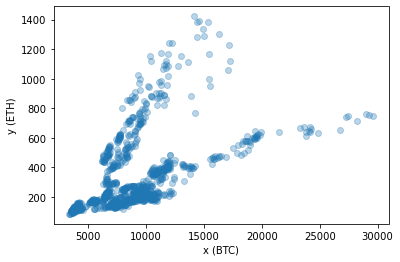

In [271]:
#x(BTC) and y(ETH) are obtained from the Dataframe
x=df_merge_col[['High']]
y=df_merge_col[['high']]
# Plot of X and Y
plt.scatter(x,y,alpha=.3)
plt.xlabel("x (BTC)")
plt.ylabel("y (ETH)")

In [272]:
x=np.array(x)
y=np.array(y)
type(x)

numpy.ndarray

## OLS estimates of $\beta$  and  $\alpha$

In [273]:
#Beta and Alpha
beta = ((np.multiply(y, x)).mean()-np.mean(x)*np.mean(y))/((np.multiply(x, x)).mean()-np.mean(x)*np.mean(x))
alpha =np.mean(y)-beta*np.mean(x)
print("alpha =",alpha, "\nbeta =",beta)

alpha = 35.79431090827393 
beta = 0.03360385708843768


In [274]:
#Error
y_hat = alpha + np.multiply(beta,x)
L = np.sum(np.multiply(y - y_hat,y - y_hat))
L


46048811.7298637

In [148]:
#coins = pd.concat([coins, table.high],  axis=1) 
#coins.columns = pair 
#coins